# Classification

In this course we'll be learning the concepts of Classification in Machine Learning.

## Problem Statement

The task of this Course is to classify handwritten digits.

## About the MNIST dataset

It is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.



## Fetching the data

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the dataset

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

### Structure of Datasets loaded by Scikit Learn

Datasets loaded by Sklearn have a dictionary structure. They have the following keys :

1. A DESCR key describing the dataset
1. A data key containing an array with one row per instance and one column per feature
1. A target key containing an array with the labels


### Looking into our Datasets

Out datasets consists of 70,000 images and each image has 784 features. A image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Since there are 70,000 images with 28x28 pixels

In [3]:
y.shape

(70000,)

This is label for each of the image. Since there are 70,000 images, hence there are 70,000 labels.

### Looking at one of the datasamples

To view the image of a single digit,all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

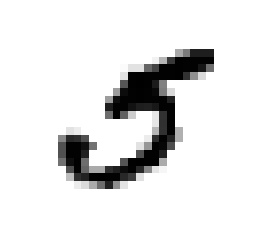

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]   # Selecting the 36,000 image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

The image looks like a 5. Let's verify it.

In [5]:
y[36000]

5.0

## Test train split

We need to split the data into test and train data. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)


In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Also we need to shuffle our training data so that it ensures that we don't miss out any digit in a cross validation fold.

In [7]:
import numpy as np
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


## Classifying our Digits

### Training a Binary Classifier

Let us first simplify our problem and make a model that only predicts if the digit is 5 or not. This will be a example of a "Binary Classifier".

Lets create target vector for our classification.

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Now let’s pick a classifier and train it. A good place to start is with a **Stochastic Gradient Descent (SGD)** classifier, using **Scikit-Learn’s SGDClassifier class**. This classifier has the advantage of being
capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning). Let’s create an **SGDClassifier** and train it on the whole training set:

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10) # if you want reproducible results set the random_state value.
sgd_clf.fit(X_train, y_train_5)

# Previously we had stored the digit 5 to some_digit, let's verify it on out model

sgd_clf.predict([some_digit])

array([ True], dtype=bool)

Since it gives a output of **True**, hence out binary classifier correctly identified the digit 5 from our dataset.

## Measuring the performace of our Classifier

Evaluating a classifier is often significantly trickier than evaluating a regressor.

________
+ **Measuring Accuracy Using Cross-Validation**
______________
We will use the cross_val_score() function to evaluate your **SGDClassifier model** using **K-fold cross-
validation**, with three folds. **K-fold cross-validation** means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds. 

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") 
# Since we need 3 folds hence we will set sv to 3

array([ 0.9486,  0.9654,  0.957 ])

This gives us the accuracy for all the 3 folds which is above 95% , which is a good accuracy. But accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets.

**What is a Skewed dataset ?**
When some classes are much more frequent than others, then the dataset is said to be skewed.

Let's verify the fact that accuracy is not best for Skewed dataset. In our case only 10% of the data is 5. So its a skewed dataset. So if a classifier always predicts 5 than its accuracy is 90%. Lets see it in action.



In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([ 0.909  ,  0.90715,  0.9128 ])

So in this case our accuracy is above 90%. **Hence we need a better measure of performace for our classifier.**

____________
+ **Measuring performace using a Confusion Matrix**
____________

A much better way to evaluate the performance of a classifier is to look at the **confusion matrix**. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now.

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation,
but instead of returning the evaluation scores, it returns the predictions made on each test fold

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53606,   973],
       [ 1607,  3814]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

**By definition a confusion matrix C is such that C<sub>i, j</sub> is equal to the number of observations known to be in group i but predicted to be in group j.**

**Thus in binary classification, the count of true negatives is C<sub>0,0</sub>, false negatives is C<sub>1,0</sub>, true positives is C<sub>1,1</sub> and false positives is C<sub>0,1</sub>.**

The first row of this matrix considers non-5 images (the negative class):

 + 53,606 of them were correctly classified as non-5s (they are called true negatives)
 + The remaining 973 were wrongly classified as 5s (false positives). 
 
The second row considers the images of 5s (the positive class): 

+ 1,607 were wrongly classified as non-5s (false negatives)
+ The remaining 3,814 were correctly classified as 5s (true positives).


______________
+ **Measuring accuracy using Precision, Recall and F1 score**
________

**What is Precision, Recall on slides**

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

In [16]:
from sklearn.metrics import precision_score, recall_score

print ("Precision score is : " , precision_score(y_train_5, y_train_pred))
print ("Recall score is : " , recall_score(y_train_5, y_train_pred))

Precision score is :  0.796741174013
Recall score is :  0.70356022874


It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of
precision and recall.

F1 = (2 x precision X recall ) / (precision + recall)

In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.74725705329153613

The F1 score favors classifiers that have similar precision and recall. 

This is not always what you want:
In some contexts you mostly care about precision, and in other contexts you really care about recall.

+ If you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection).

+ Suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).


**Increasing precision reduces recall, and vice versa.**

**How does the SGDClassifier work?**

For each instance, it computes a score based on a **decision function**, and if that score is greater than a **threshold**, it assigns the instance to the positive class, or else it assigns it to the negative class.
The SGDClassifier uses a threshold equal to 0. 

*Raising the **threshold** decreases **Recall** *

In [19]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 1206.46829305])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [22]:
# Setting the threshold to 20000
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

This confirms that raising the threshold decreases recall.

**Precision - Recall curve**

Let's try to find the score from the decision_function. Using these scores we will plot a relation between Precision and Recall, by setting different values of the Threshold.

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
y_scores

array([ -310439.22033531, -1245707.68733892,  -459236.52406922, ...,
        -587186.22337404,  -326410.61046729,  -173498.05956318])

In [26]:
# Now we will use these values of y_scores to find different values for precison and recall for varying thresholds.

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


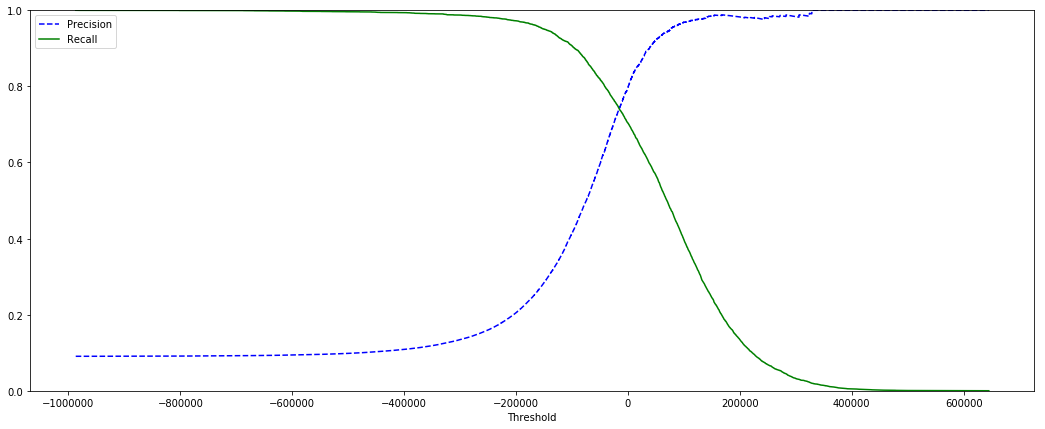

In [31]:
# Plotting our results

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(18,7))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Now you can simply select the threshold value that gives you the best precision/recall tradeoff for your task.

Another way to select a good precision/recall tradeoff is to plot precision directly against recall directly.

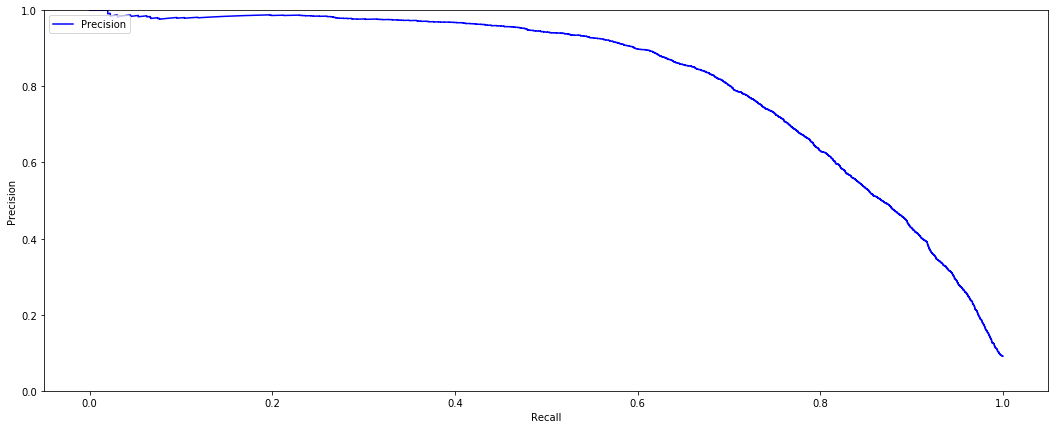

In [33]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(18,7))
    plt.plot(recalls[:-1], precisions[:-1], "b-", label="Precision")
    #plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

**ROC curve**


The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the **true positive rate (another name for recall)** against the **false positive rate**.

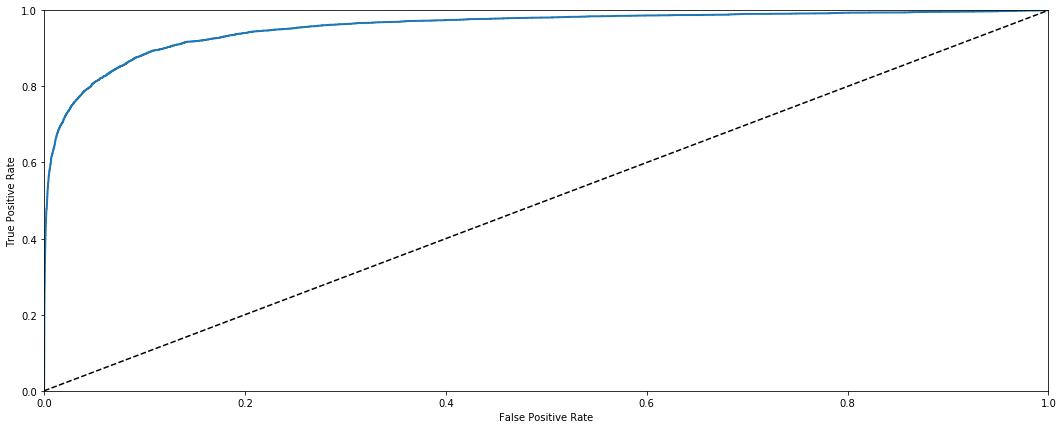

In [35]:
# Making the ROC curve


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(18,7))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: **the higher the recall (TPR), the more false positives (FPR) the classifier produces**. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


One way to compare classifiers is to measure the **area under the curve (AUC)**. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [36]:
# Scikit-Learn provides a function to compute the ROC AUC:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95505444284581809

*As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise.*

**Comparision of SGDClassifier and RandomForestClassifier on the basis of ROC-AUC**

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the
SGDClassifier.

First, you need to get scores for each instance in the training set. But due to the way it
works, the **RandomForestClassifier class** does not have a **decision_function()**
method. Instead it has a **predict_proba()** method.

Scikit-Learn classifiers generally have one or the other.

The **predict_proba()** method returns an array containing a row per instance and a column per
class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

In [38]:

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest

array([[ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ]])

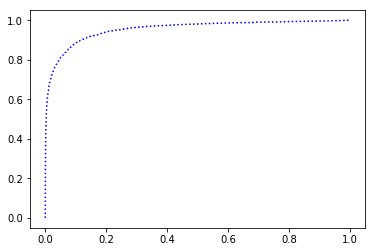

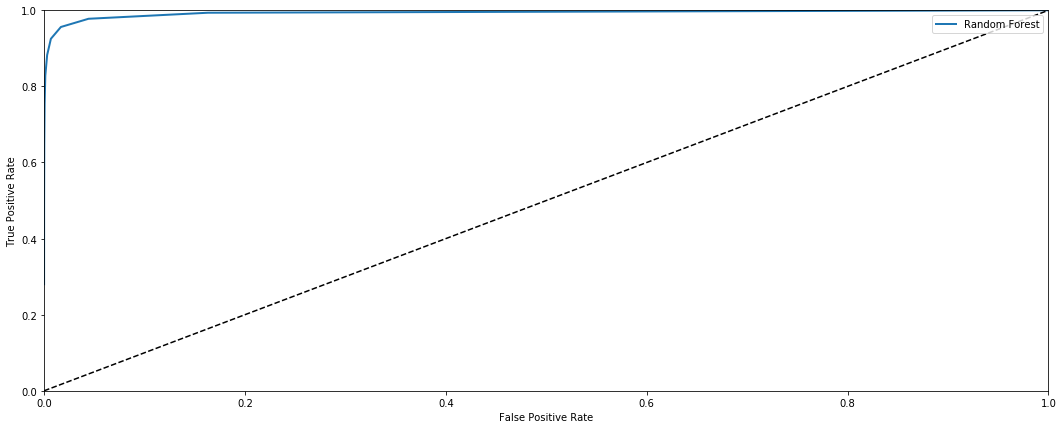

In [42]:
# But to plot a ROC curve, you need scores, not probabilities.
# A simple solution is to use the positive class’s probability as the score:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="upper right")
plt.show()